In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
data.shape

(205, 26)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
percent_missing = data.isna().sum() * 100 / len(data)
for index in percent_missing.index:
    if percent_missing[index] > 0:
        print('missing value', index, '=', percent_missing[index], '%')
if data.isna().sum().sum() == 0:
    print('tidak ada nan value')

tidak ada nan value


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [8]:
data.drop('car_ID', axis=1, inplace=True)

In [9]:
data.describe(include='O').transpose()

,count,unique,top,freq
CarName,205,147,toyota corolla,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [10]:
data.rename(columns={'CarName':'carname'}, inplace=True)

In [11]:
data.columns

Index(['symboling', 'carname', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
cat_col = data.select_dtypes(include=['object']).columns
num_col = data.select_dtypes(exclude=['object']).columns
data_cat = data[cat_col]
data_num = data[num_col]

In [13]:
data_cat.head()

,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [14]:
data_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


## Data Visualization

In [16]:
data['carbrand'] = data['carname'].str.split(' ',expand=True)[0]

In [17]:
data.carbrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [18]:
data.carbrand = data.carbrand.replace({'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                                         'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [19]:
data.carbrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
carbrand_price = data[['carbrand','price']].groupby(by='carbrand')['price'].mean()

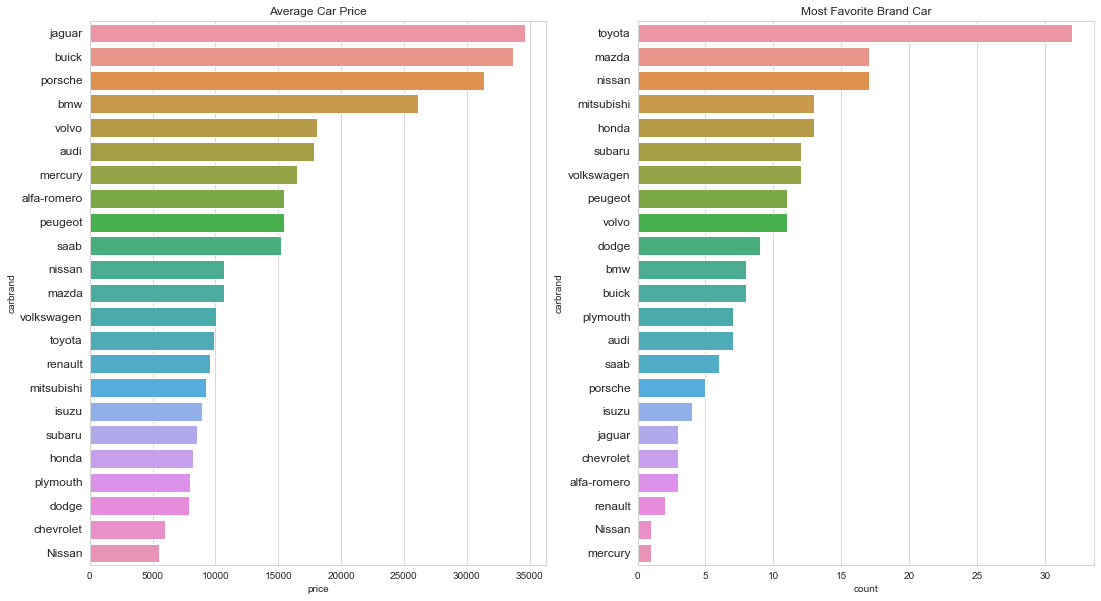

In [129]:
plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
sns.barplot(y=carbrand_price.index, x=carbrand_price, order=carbrand_price.sort_values(ascending=False).index)
plt.title('Average Car Price')
plt.tick_params(axis='y', labelsize=12)

plt.subplot(1,2,2)
sns.countplot(y='carbrand', data=data, order=data.carbrand.value_counts().sort_values(ascending=False).index)
plt.title('Most Favorite Brand Car')
plt.tick_params(axis='y', labelsize=12)
plt.show()

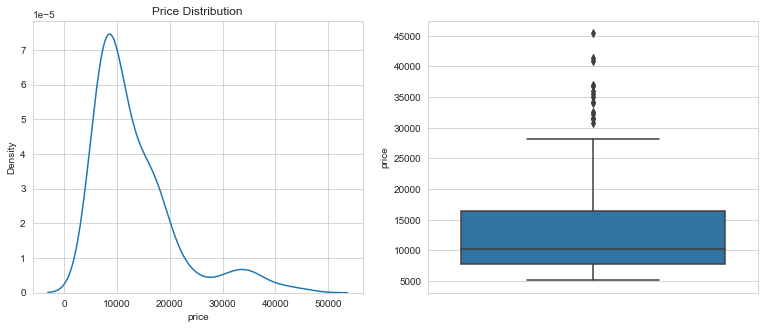

In [23]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.kdeplot(data.price)
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.boxplot(y=data.price)
plt.show()

In [24]:
data_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


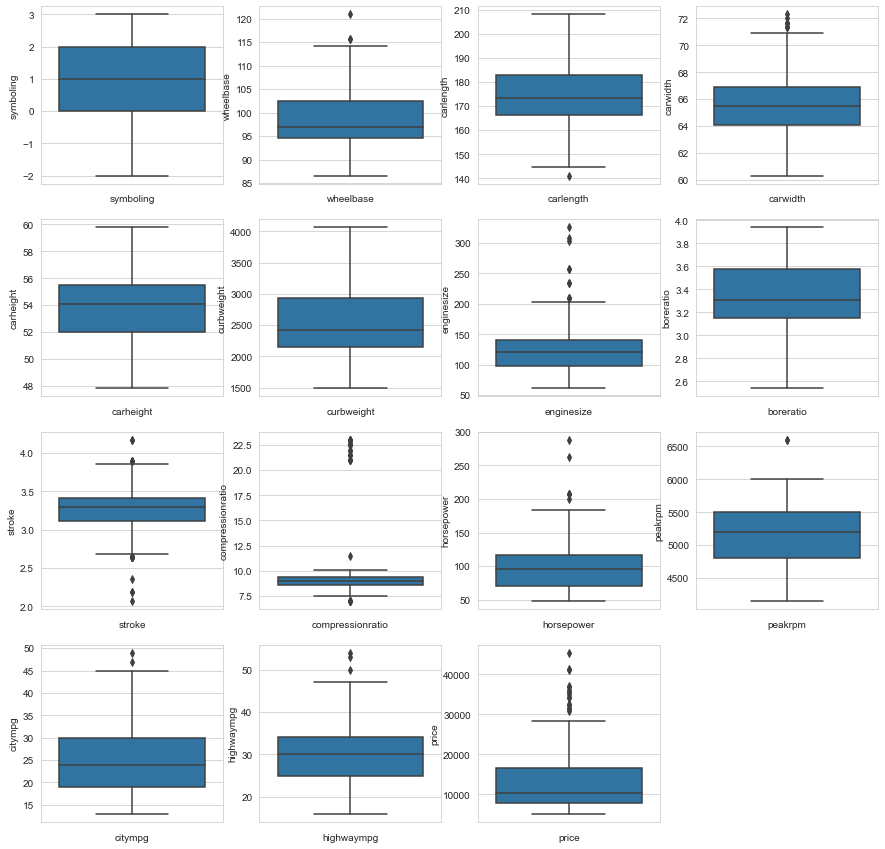

In [25]:
nrows = 4 
ncols = 4 
index = 1  
fig = plt.figure(figsize=(15,15))
for num_var in num_col:
    plt.subplot(nrows, ncols, index)
    plt.xlabel(num_var)
    sns.boxplot(y=data[num_var])
    index = index + 1
plt.show()
#thank's to https://www.kaggle.com/asimislam/tutorial-python-subplots

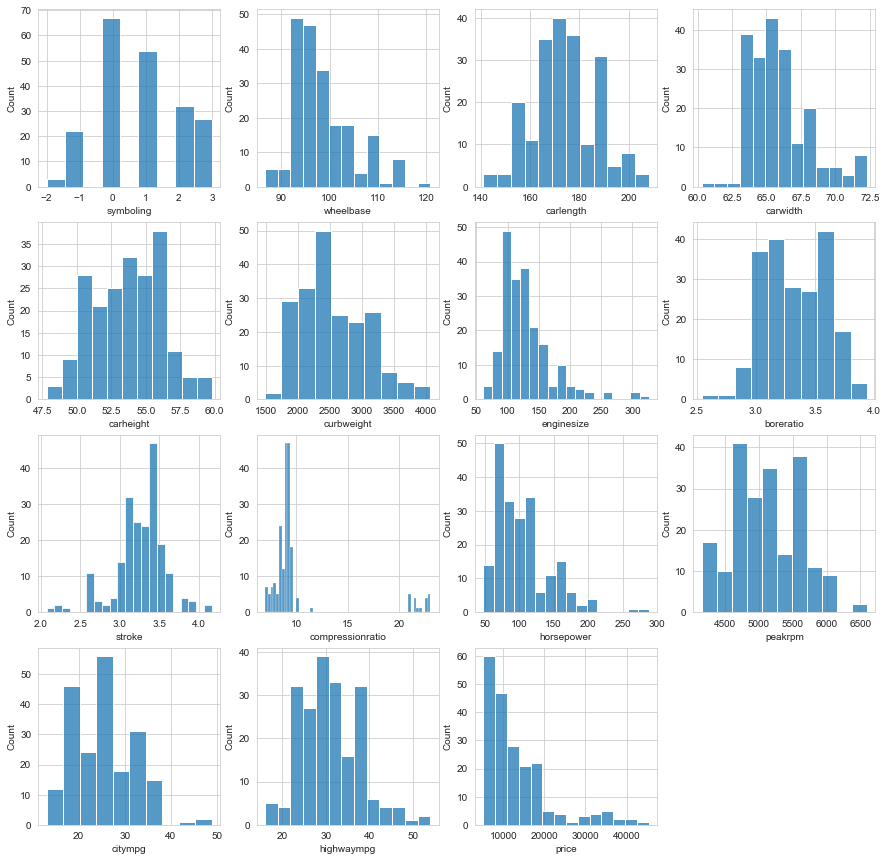

In [26]:
nrows = 4 
ncols = 4 
index = 1  
fig = plt.figure(figsize=(15,15))
for num_var in num_col:
    plt.subplot(nrows, ncols, index)
    plt.xlabel(num_var)
    sns.histplot(data[num_var])
    index = index + 1
plt.show()
#thank's to https://www.kaggle.com/asimislam/tutorial-python-subplots

## Categorical variables visualization

In [27]:
data_cat.describe().transpose()

,count,unique,top,freq
carname,205,147,toyota corolla,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


In [28]:
# nrows = 3 
# ncols = 3 
# index = 1  
# fig = plt.figure(figsize=(15,10))
# for cat_var in cat_col.drop('carname'):
#     plt.subplot(nrows, ncols, index)
#     sns.boxplot(x=cat_var, y='price', data=data)
#     index = index + 1
# plt.show()

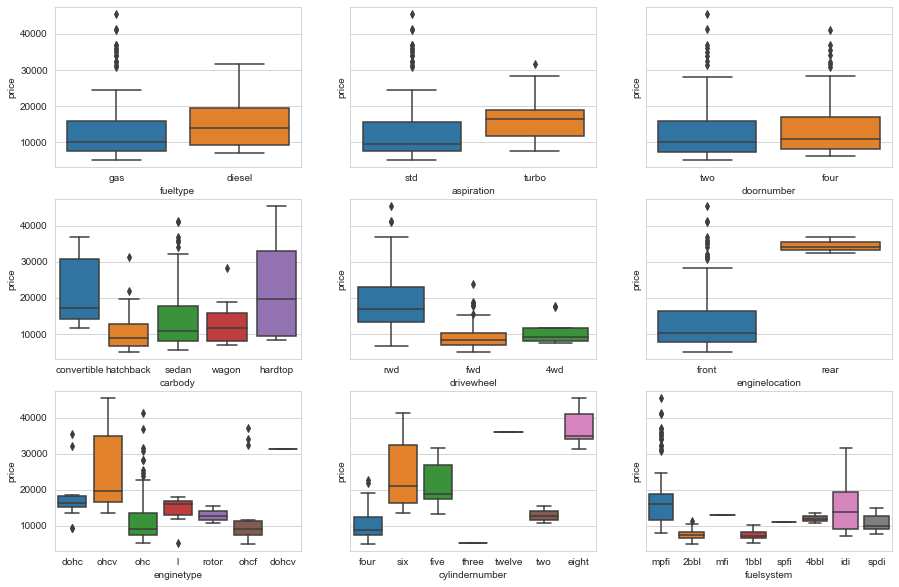

In [29]:
nrows = 3 
ncols = 3 
rows = 0 
cols = 0   
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10), sharey=True)
for cat_var in cat_col.drop('carname'):
    if cols > ncols - 1:
        rows = rows + 1
        cols = 0
    sns.boxplot(ax=axes[rows,cols], x=cat_var, y='price', data=data)
    cols = cols + 1
plt.show()

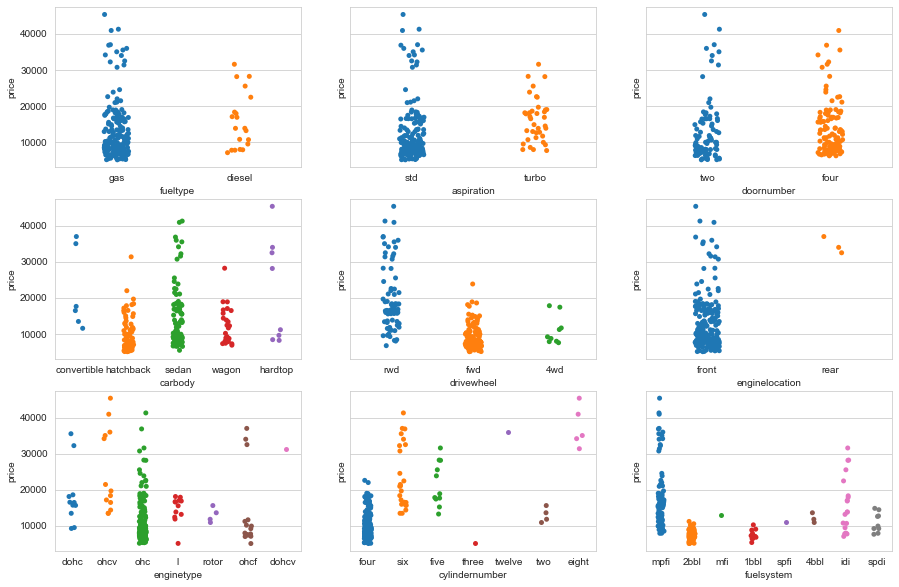

In [30]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10), sharey=True)
sns.stripplot(ax=axes[0,0], x='fueltype', y='price', data=data)
sns.stripplot(ax=axes[0,1], x='aspiration', y='price',  data=data)
sns.stripplot(ax=axes[0,2], x='doornumber', y='price',  data=data)
sns.stripplot(ax=axes[1,0], x='carbody', y='price',  data=data)
sns.stripplot(ax=axes[1,1], x='drivewheel', y='price',  data=data)
sns.stripplot(ax=axes[1,2], x='enginelocation', y='price',  data=data)
sns.stripplot(ax=axes[2,0], x='enginetype', y='price',  data=data)
sns.stripplot(ax=axes[2,1], x='cylindernumber', y='price',  data=data)
sns.stripplot(ax=axes[2,2], x='fuelsystem', y='price',  data=data)
plt.show()

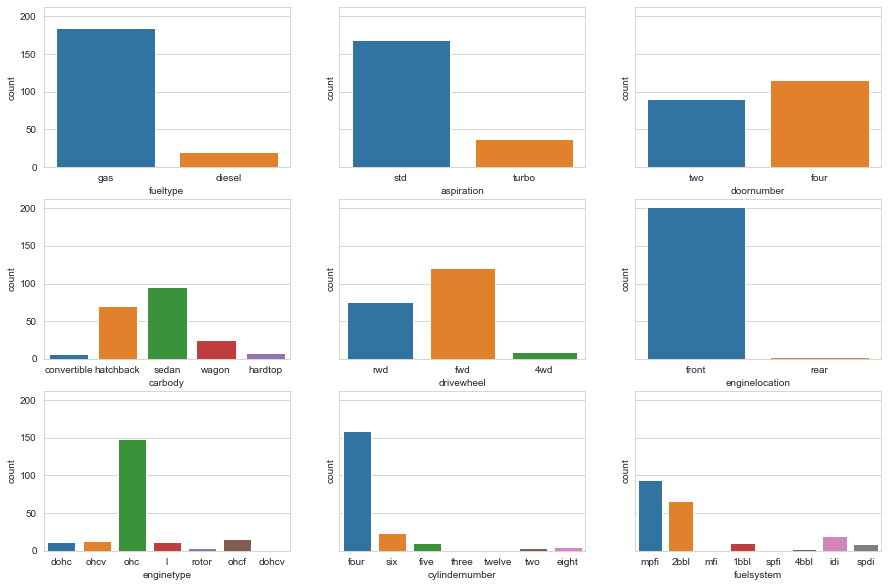

In [31]:
nrows = 3 
ncols = 3 
rows = 0 
cols = 0   
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10), sharey=True)
for cat_var in cat_col.drop('carname'):
    if cols > ncols - 1:
        rows = rows + 1
        cols = 0
    sns.countplot(ax=axes[rows,cols], x=cat_var, data=data)
    cols = cols + 1
plt.show()

## Feature Selection

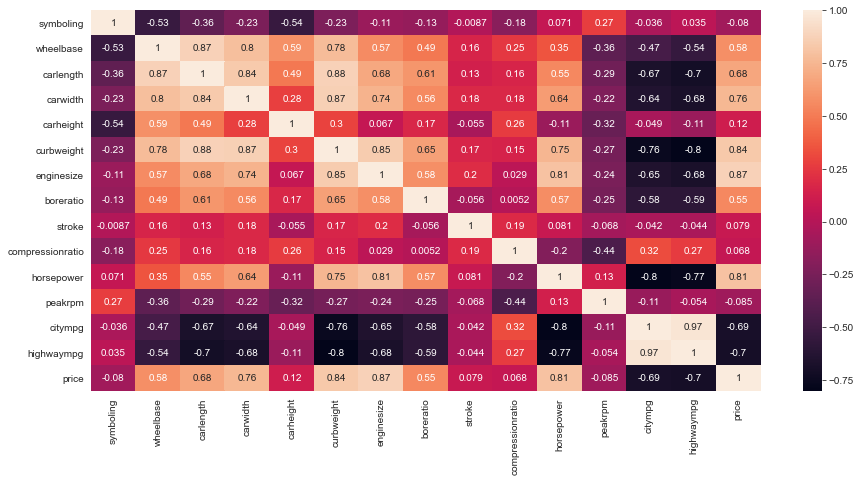

In [32]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

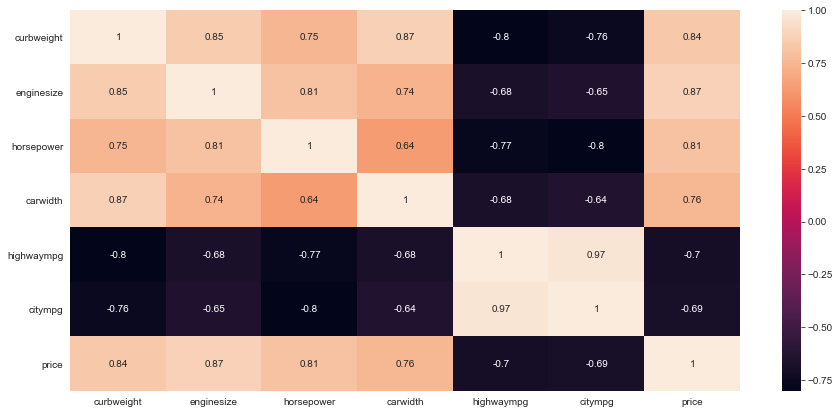

In [33]:
plt.figure(figsize=(15,7))
sns.heatmap(data[['curbweight','enginesize','horsepower','carwidth','highwaympg','citympg','price']].corr(), annot=True)
plt.show()

In [34]:
selected_num_col = ['enginesize','carwidth','highwaympg']
selected_cat_col = cat_col.drop(['carname','doornumber'])

In [41]:
abs(data.corr().price)

symboling           0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm             0.085267
citympg             0.685751
highwaympg          0.697599
price               1.000000
Name: price, dtype: float64

In [48]:
for index, feature in zip(data.corr().price.index, data.corr().price):
    if abs(feature) > 0.6:
        print(index,feature)

carlength 0.6829200156779629
carwidth 0.759325299741511
curbweight 0.8353048793372975
enginesize 0.8741448025245117
horsepower 0.8081388225362214
citympg -0.68575133602704
highwaympg -0.6975990916465573
price 1.0


In [53]:
data_new = data.copy()

In [45]:
dummies = pd.get_dummies(data_new[selected_cat_col])
dummies.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [54]:
data_new = pd.concat([data_new[selected_num_col], dummies, data_new.price], axis=1)
data_new.head()

,enginesize,carwidth,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,...,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,130,64.1,27,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,13495.0
1,130,64.1,27,0,1,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,16500.0
2,152,65.5,26,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,16500.0
3,109,66.2,30,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13950.0
4,136,66.4,22,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,17450.0


In [55]:
for index, feature in zip(data_new.corr().price.index, data_new.corr().price):
    if abs(feature) > 0.6:
        print(index,feature)

enginesize 0.8741448025245117
carwidth 0.759325299741511
highwaympg -0.6975990916465573
drivewheel_fwd -0.6019502965330911
drivewheel_rwd 0.6389565386618761
cylindernumber_four -0.6977616598768134
price 1.0


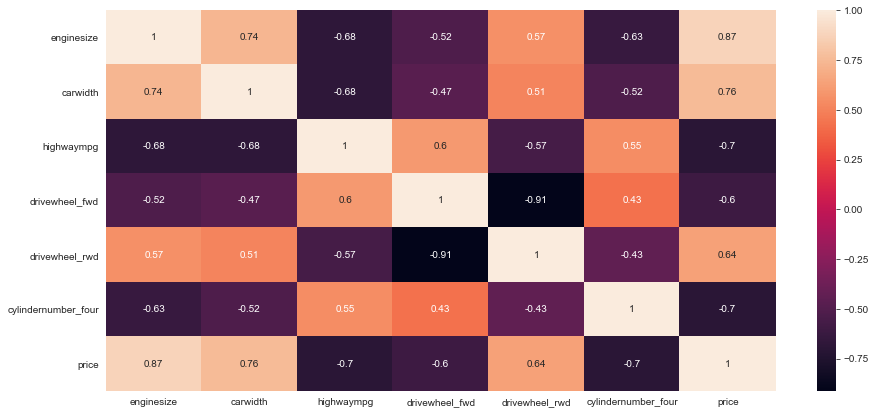

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(data_new[['enginesize','carwidth','highwaympg','drivewheel_fwd','drivewheel_rwd','cylindernumber_four','price']].corr(), annot=True)
plt.show()

## Rescalling numeric value

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [71]:
data_new[['enginesize','carwidth','highwaympg']] = scaler.fit_transform(data_new[['enginesize','carwidth','highwaympg']])

In [72]:
X = data_new[['enginesize','carwidth','highwaympg','drivewheel_rwd','cylindernumber_four']]
y = data_new.price

In [74]:
X.head()

,enginesize,carwidth,highwaympg,drivewheel_rwd,cylindernumber_four
0,0.074449,-0.844782,-0.546059,1,1
1,0.074449,-0.844782,-0.546059,1,1
2,0.604046,-0.190566,-0.691627,1,0
3,-0.431076,0.136542,-0.109354,0,1
4,0.218885,0.230001,-1.273900,0,0


In [75]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("X_test shape :", X_test.shape, ", y_test shape :", y_test.shape)
print("X_train shape:", X_train.shape, ", y_train shape:", X_train.shape)

X_test shape : (62, 5) , y_test shape : (62,)
X_train shape: (143, 5) , y_train shape: (143, 5)


In [85]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cv_score = cross_val_score(lm, X_train, y_train, cv=5)
print('R^2 mean:', cv_score.mean())

R^2 mean: 0.8054500040618002


In [123]:
yhat_train = cross_val_predict(lm, X_train, y_train, cv=5)
yhat_test = cross_val_predict(lm, X_test, y_test, cv=5)

In [112]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    label = [RedName, BlueName]
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r")
    ax2 = sns.kdeplot(BlueFunction, color="b", ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend(labels=label)

    plt.show()
    plt.close()

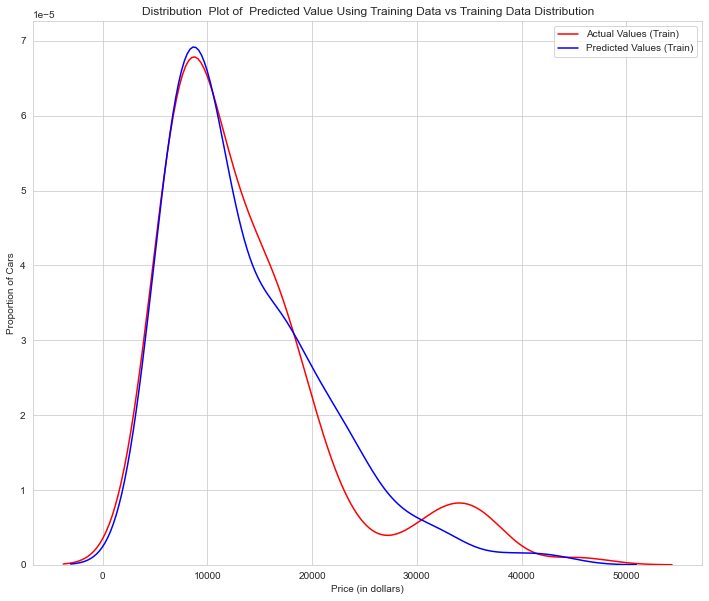

In [124]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

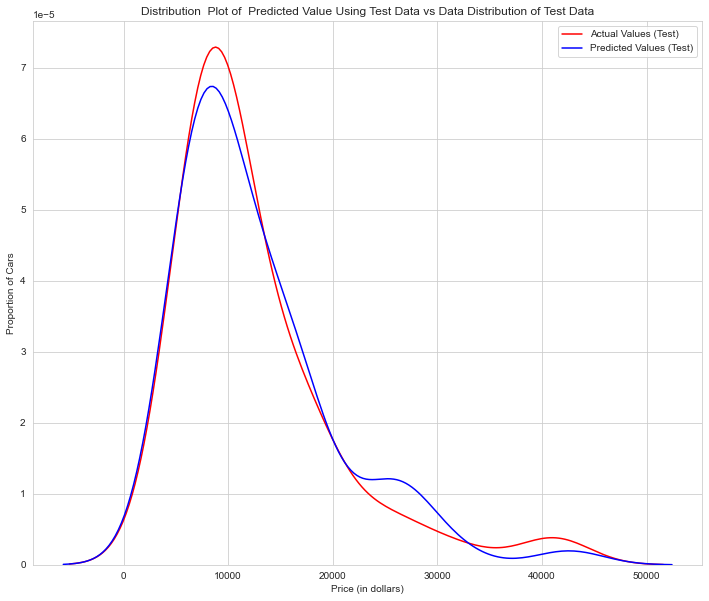

In [125]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)